# Signals and Systems CA1

Question 3: Calculate system responses

# 3.1
We calculate the system response by convolving h[n] and x[n]:

$$\forall n<0$$ : h[k] and x[n-k] don't insersect so: $$y[n] = 0$$

$$\forall 0\leq n \geq 4:$$ h[k]  and  x[n-k] intersect so: $$y[n] = \Sigma_{k=0}^{n} (0.5)^k = \frac{1-(0.5)^{n+1}}{1-0.5} = 2*(1-(0.5)^{n+1})$$
$$\forall n > 4: y[n] = 2*(1-(0.5)^{4+1})*2^{n-4} = \frac{31}{16} * (0.5)^{n-4} = \frac{31}{2^n}$$

For each intervals we have:

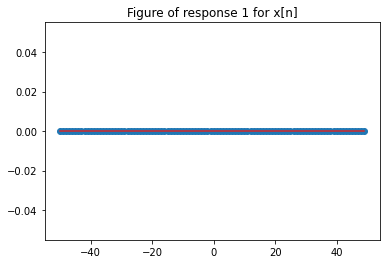

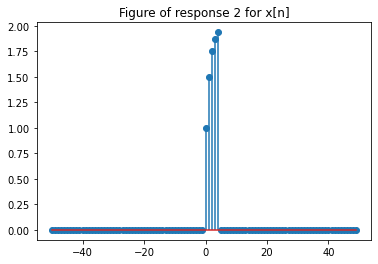

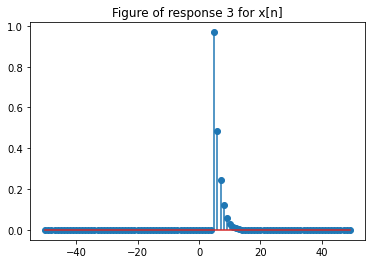

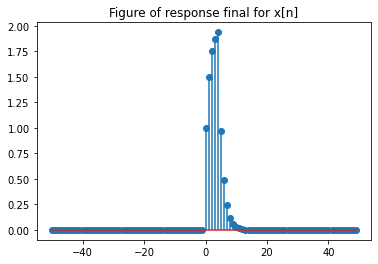

In [8]:
import numpy as np
from matplotlib import pyplot as plt

title = "Figure of response {} for x[n]"
def draw(response,x_, y_):
    plt.stem(x_, y_, use_line_collection=True)
    plt.title(title.format(response))
    plt.show()

responses = list()
n = np.arange(-50, 50, 1).astype(float)
responses.append(np.piecewise(n, [n < 0, n >= 0], [0, 0]))
responses.append(np.piecewise(n, [np.logical_and(n >= 0, n <= 4), np.logical_or(n < 0, n > 4)], [lambda n: 2 - (1/2)**n, 0]))
responses.append(np.piecewise(n, [n > 4, n <= 4], [lambda n: 31/(2**n), 0]))

for i in range(len(responses)):
    draw(i+1, n, responses[i])
    if(i == 0):
        final_response = responses[i]
    else:
        final_response += responses[i]

draw("final", n, final_response)

We could also seperate x[n] to 5 impulse functions and find response for each function and finally get the sum of all responses too.